# Mapping Fathom flood data

The Fathom flood data are stored on an AWS bucket as tiles in virtual rasters. This code extracts values for specific scenarios, for a specific country, and plots them.

In [22]:
import sys
import os
import rasterio

import geopandas as gpd

sys.path.insert(0, "../../src")

import GOSTrocks.mapMisc as mapMisc
import GOSTrocks.dataMisc as dMisc
import GOSTrocks.rasterMisc as rMisc
from GOSTrocks.misc import tPrint

In [8]:
iso3 = "KEN"
out_folder = f"/home/wb411133/temp/FATHOM/{iso3}"
if not os.path.exists(out_folder):
    os.makedirs(out_folder)

# This demo uses the default national boundaries included with GeoPandas, but this can be changed here
world_filepath = gpd.datasets.get_path("naturalearth_lowres")
world = gpd.read_file(world_filepath)
inB = world.loc[world["iso_a3"] == iso3].copy()

In [9]:
# Select layer to download
flood_type = ["COASTAL", "FLUVIAL", "PLUVIAL"]
defence = ["DEFENDED"]
return_period = ["1in50"]
climate_model = ["PERCENTILE50"]
year = ["2020"]

# all_vrts is a pandas dataframe with all the vrt paths to the global datasets, with columns defining
# the various models' defining attributes
all_vrts = dMisc.get_fathom_vrts(True)
sel_images = all_vrts.loc[
    (all_vrts["FLOOD_TYPE"].isin(flood_type))
    & (all_vrts["DEFENCE"].isin(defence))
    & (all_vrts["RETURN"].isin(return_period))
    & (all_vrts["CLIMATE_MODEL"].isin(climate_model))
]

In [10]:
sel_images

,RETURN,FLOOD_TYPE,DEFENCE,DEPTH,YEAR,CLIMATE_MODEL,PATH
390,1in50,COASTAL,DEFENDED,DEPTH,2020,PERCENTILE50,s3://wbg-geography01/FATHOM/GLOBAL-1ARCSEC-NW_...
416,1in50,FLUVIAL,DEFENDED,DEPTH,2020,PERCENTILE50,s3://wbg-geography01/FATHOM/GLOBAL-1ARCSEC-NW_...
442,1in50,PLUVIAL,DEFENDED,DEPTH,2020,PERCENTILE50,s3://wbg-geography01/FATHOM/GLOBAL-1ARCSEC-NW_...


In [23]:
flood_data = {}
for idx, row in sel_images.iterrows():
    fluvialR = rasterio.open(row["PATH"])
    rData, profile = rMisc.clipRaster(fluvialR, inB)
    flood_data[row["FLOOD_TYPE"]] = [rData, profile]
    tPrint(row["PATH"])

08:44:55	s3://wbg-geography01/FATHOM/GLOBAL-1ARCSEC-NW_OFFSET-1in50-COASTAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0.vrt
08:46:01	s3://wbg-geography01/FATHOM/GLOBAL-1ARCSEC-NW_OFFSET-1in50-FLUVIAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0.vrt
08:47:12	s3://wbg-geography01/FATHOM/GLOBAL-1ARCSEC-NW_OFFSET-1in50-PLUVIAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0.vrt


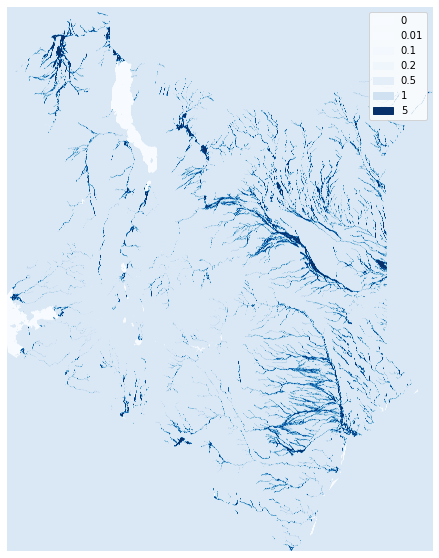

In [24]:
rData, profile = flood_data["FLUVIAL"]
with rMisc.create_rasterio_inmemory(profile, rData) as floodR:
    mapMisc.static_map_raster(
        floodR, colormap="Blues", thresh=[0, 0.01, 0.1, 0.2, 0.5, 1, 5]
    )

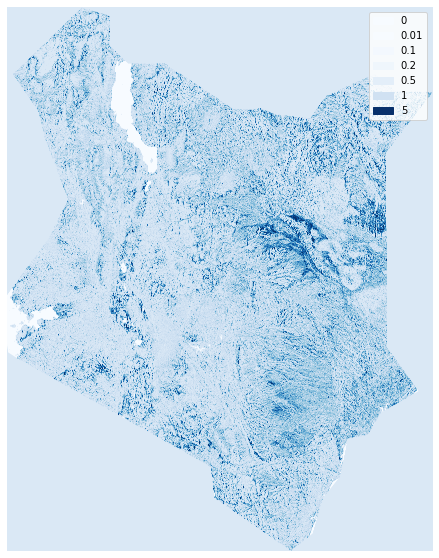

In [25]:
rData, profile = flood_data["PLUVIAL"]
with rMisc.create_rasterio_inmemory(profile, rData) as floodR:
    mapMisc.static_map_raster(
        floodR, colormap="Blues", thresh=[0, 0.01, 0.1, 0.2, 0.5, 1, 5]
    )

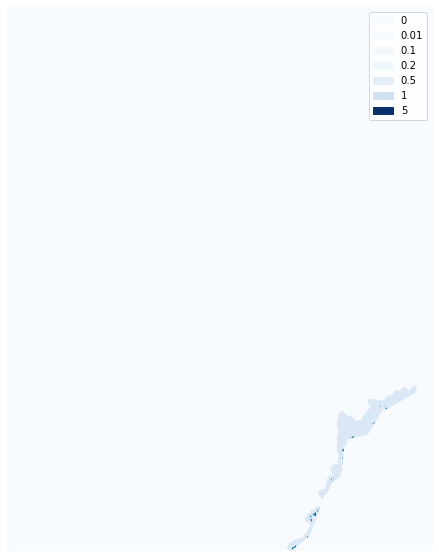

In [26]:
rData, profile = flood_data["COASTAL"]
with rMisc.create_rasterio_inmemory(profile, rData) as floodR:
    mapMisc.static_map_raster(
        floodR, colormap="Blues", thresh=[0, 0.01, 0.1, 0.2, 0.5, 1, 5]
    )